# Kaggle Titanic Competition

## Import raw data

In [63]:
import csv

with open('data/train.csv',newline='') as csvFile:

    reader = csv.reader(csvFile, delimiter=',')

    l = list(reader)
    header = l[0]
    rawData = l[1:]
    allLabels = [passenger[1] for passenger in rawData]

## Get normalized numeric data

In [56]:
# convert gender and embark info to numeric data

data = []
numericFields = [2,5,6,7,9]
convertFields = [4,11]

def getNumericDict(rawData, field):
    allData = {passenger[field] for passenger in rawData}

    numericDict = {}
    i = 0

    for datum in allData:
        numericDict[datum] = i
        i += 1

    return numericDict

numericDicts = {field:getNumericDict(rawData,field) for field in convertFields}

for passenger in rawData:
    numeric = [passenger[i] for i in numericFields]
    converted = [numericDicts[i][passenger[i]] for i in convertFields]

    passengerData = [float(f) if f!='' else 0 for f in numeric+converted]
    data.append(passengerData)

In [58]:
# scale data into range (0,1) using numpy

npData = np.array(data,dtype=float)

maxes = np.amax(npData, axis=0)
mins = np.amin(npData, axis=0)
maxes = np.where(maxes==0,.001,maxes) - mins[None,:]

normData = (npData-mins[None,:])/maxes

In [110]:
# simple validation data separation
# TODO: change to k-fold

valSplit = 600
testSplit = 800

trainData = normData[:valSplit]
validData = normData[valSplit:testSplit]
testData = normData[testSplit:]

trainLabels = np.asarray(allLabels[:valSplit], dtype=float)
validLabels = np.asarray(allLabels[valSplit:testSplit], dtype=float)
testLabels = np.asarray(allLabels[testSplit:], dtype=float)

## Build model

In [111]:
from keras import models
from keras import layers

inputLen = trainData.shape[1]

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(inputLen,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

## Train model

In [112]:
history = model.fit(trainData,trainLabels,
    epochs=20,
    batch_size=64,
    validation_data=(validData,validLabels))

Epoch 1/20
10/10 [==============================] - 1s 16ms/step - loss: 0.7367 - acc: 0.4694 - val_loss: 0.7593 - val_acc: 0.3600
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 0.7383 - acc: 0.4149 - val_loss: 0.7313 - val_acc: 0.3750
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.7080 - acc: 0.4474 - val_loss: 0.7074 - val_acc: 0.3900
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.6786 - acc: 0.4984 - val_loss: 0.6866 - val_acc: 0.4200
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6674 - acc: 0.5152 - val_loss: 0.6696 - val_acc: 0.5150
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6520 - acc: 0.6120 - val_loss: 0.6571 - val_acc: 0.6750
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.6399 - acc: 0.7052 - val_loss: 0.6467 - val_acc: 0.7300
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6295 - acc: 0.7

## Plot losses

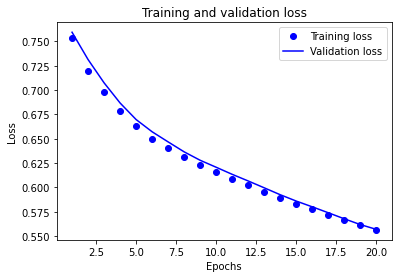

In [114]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plot accuracy

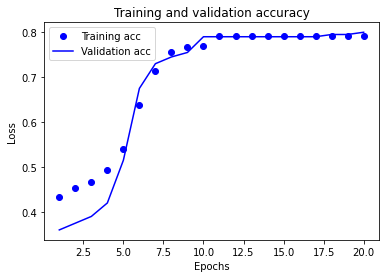

In [115]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [130]:
print(f'{round(model.evaluate(testData,testLabels)[1]*100,2)}% test data accuracy')

3/3 [==============================] - 0s 1ms/step - loss: 0.5561 - acc: 0.7692
76.92% test data accuracy
